In [90]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [10]:
#importing dataframe
df = pd.read_csv('Facebook_Marketplace_data.csv')

In [12]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [14]:
#first few rows of dataframe
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [16]:
#descriptive statistics
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [20]:
#to get basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [38]:
#to find the datatype of each column
df.dtypes

status_id             int64
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

In [28]:
#finding the missing values in the columns
df.isna().sum()
#replacing missing values with median value of the column
df['num_reactions'].fillna(df['num_reactions'].median(),inplace=True)
df['num_comments'].fillna(df['num_comments'].median(),inplace=True)
df['num_shares'].fillna(df['num_shares'].median(),inplace=True)
df['num_likes'].fillna(df['num_likes'].median(),inplace=True)
df['num_loves'].fillna(df['num_loves'].median(),inplace=True)
df['num_wows'].fillna(df['num_wows'].median(),inplace=True)
df['num_hahas'].fillna(df['num_hahas'].median(),inplace=True)
df['num_sads'].fillna(df['num_sads'].median(),inplace=True)
df['num_angrys'].fillna(df['num_angrys'].median(),inplace=True)

In [30]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


0      2018-04-22 06:00:00
1      2018-04-21 22:45:00
2      2018-04-21 06:17:00
3      2018-04-21 02:29:00
4      2018-04-18 03:22:00
               ...        
7045   2016-09-24 02:58:00
7046   2016-09-23 11:19:00
7047   2016-09-21 23:03:00
7048   2016-09-20 00:43:00
7049   2016-09-10 10:30:00
Name: status_published, Length: 7050, dtype: datetime64[ns]
0        6
1       22
2        6
3        2
4        3
        ..
7045     2
7046    11
7047    23
7048     0
7049    10
Name: hour, Length: 7050, dtype: int32
    hour  num_reactions
0      0     261.839474
1      1     203.315725
2      2     163.907618
3      3     290.270208
4      4     242.685864
5      5     293.870968
6      6     340.213198
7      7     183.301549
8      8     204.796897
9      9     205.780761
10    10     234.508333
11    11     180.639456
12    12     196.053763
13    13     176.875000
14    14     261.333333
15    15     341.666667
16    16     283.250000
17    17     384.000000
18    18     351.750000
19 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


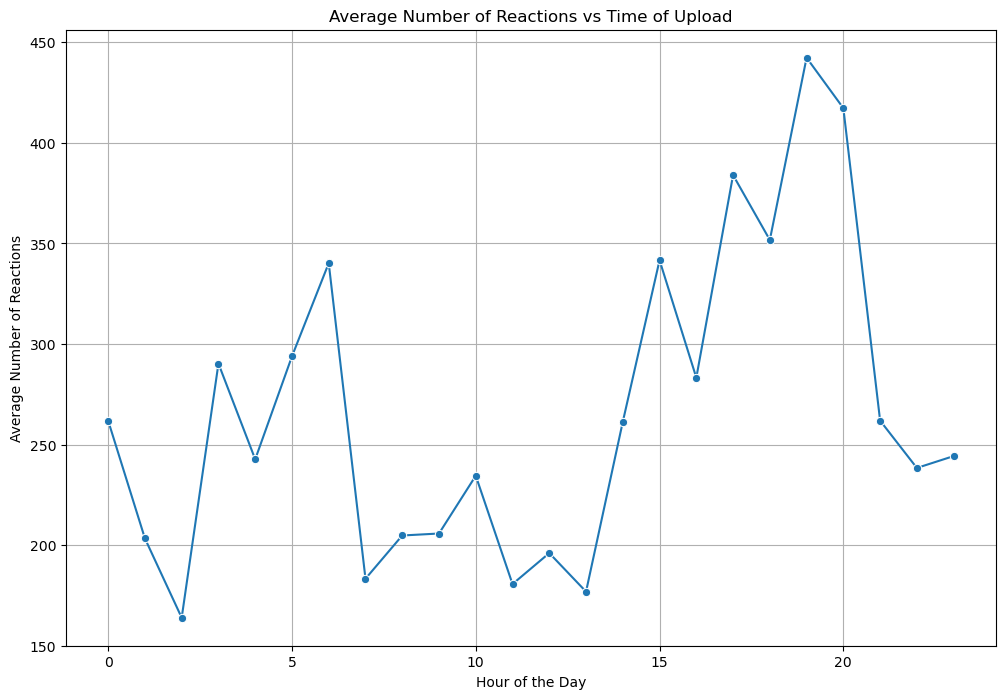

In [68]:
#How does the time of upload (`status_published`)  affects the `num_reaction`?
# to convert the status published to date and time
df['status_published']=pd.to_datetime(df['status_published']) 
print(df['status_published'] )

#extracting the hour of upload
df['hour'] = df['status_published'].dt.hour
print(df['hour'])

#to find the affect group hour and reactions
hour_reactions = df.groupby('hour')['num_reactions'].mean().reset_index()
print(hour_reactions)

#plot to find the trend of time of upload with number of reactions
plt.figure(figsize = (12, 8))
sns.lineplot(data = hour_reactions, x = 'hour', y = 'num_reactions', marker = 'o')
plt.title('Average Number of Reactions vs Time of Upload')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Reactions')
plt.grid(True)
#plt.xticks(range(0, 24))
plt.show()


               num_reactions  num_comments  num_shares  num_likes  num_loves  \
num_reactions       1.000000      0.150843    0.250723   0.994923   0.305003   
num_comments        0.150843      1.000000    0.640637   0.101687   0.521223   
num_shares          0.250723      0.640637    1.000000   0.172492   0.820000   
num_likes           0.994923      0.101687    0.172492   1.000000   0.209308   
num_loves           0.305003      0.521223    0.820000   0.209308   1.000000   
num_wows            0.267752      0.162394    0.407628   0.207800   0.508798   
num_hahas           0.176028      0.325048    0.399826   0.120784   0.507830   
num_sads            0.075138      0.236453    0.199970   0.052169   0.207600   
num_angrys          0.124326      0.225184    0.312513   0.087431   0.371001   

               num_wows  num_hahas  num_sads  num_angrys  
num_reactions  0.267752   0.176028  0.075138    0.124326  
num_comments   0.162394   0.325048  0.236453    0.225184  
num_shares     0.40762

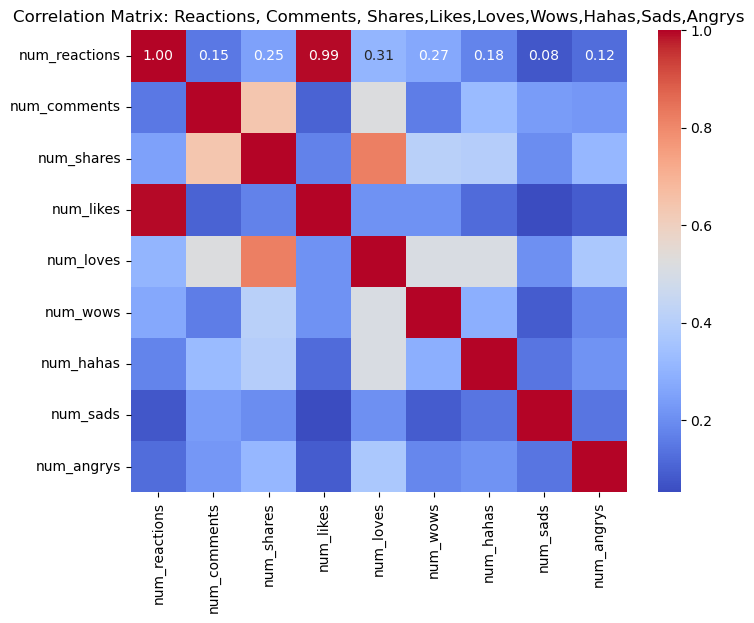

Correlation between num_reactions and num_comments: 0.15 (weak, positive)
Correlation between num_reactions and num_shares: 0.25 (weak, positive)
Correlation between num_reactions and num_likes: 0.99 (strong, positive)
Correlation between num_reactions and num_loves: 0.31 (moderate, positive)
Correlation between num_reactions and num_wows: 0.27 (weak, positive)
Correlation between num_reactions and num_hahas: 0.18 (weak, positive)
Correlation between num_reactions and num_sads: 0.08 (weak, positive)
Correlation between num_reactions and num_angrys: 0.12 (weak, positive)


In [84]:
#Correlation between the number of reactions (num_reactions) and other engagement metrics 
#Strength and direction of this correlation

#correlation
correlations = df[['num_reactions', 'num_comments', 'num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']].corr()
print(correlations)

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Reactions, Comments, Shares,Likes,Loves,Wows,Hahas,Sads,Angrys")
plt.show()
#for strength 0–0.3: Weak, 0.3–0.7: Moderate, 0.7–1.0: Strong
#for direction positive values = As one metric increases, the other tends to increase, negative values = As one metric increases, the other tends to decrease.
#0 means no correlation, +1 means perfect positive correlation, -1 means perfect negative correlation 

comments = df['num_reactions'].corr(df['num_comments'])
shares = df['num_reactions'].corr(df['num_shares'])
likes = df['num_reactions'].corr(df['num_likes'])
loves = df['num_reactions'].corr(df['num_loves'])
wows = df['num_reactions'].corr(df['num_wows'])
hahas = df['num_reactions'].corr(df['num_hahas'])
sads = df['num_reactions'].corr(df['num_sads'])
angrys = df['num_reactions'].corr(df['num_angrys'])

#to determine strength
def correlation_strength(value):
    
    if value < 0.3:
        return "weak"
    elif value < 0.7:
        return "moderate"
    else:
        return "strong"

# determine direction
def correlation_direction(value):
    if value > 0:
        return "positive"
    elif value < 0:
        return "negative"
    else:
        return "no correlation"

# correlation with comments
print(f"Correlation between num_reactions and num_comments: {comments:.2f} "
      f"({correlation_strength(comments)}, {correlation_direction(comments)})")

# correlation with shares
print(f"Correlation between num_reactions and num_shares: {shares:.2f} "
      f"({correlation_strength(shares)}, {correlation_direction(shares)})")

# correlation with likes
print(f"Correlation between num_reactions and num_likes: {likes:.2f} "
      f"({correlation_strength(likes)}, {correlation_direction(likes)})")

# correlation with loves
print(f"Correlation between num_reactions and num_loves: {loves:.2f} "
      f"({correlation_strength(loves)}, {correlation_direction(loves)})")

# correlation with wows
print(f"Correlation between num_reactions and num_wows: {wows:.2f} "
      f"({correlation_strength(wows)}, {correlation_direction(wows)})")

# correlation with hahas
print(f"Correlation between num_reactions and num_hahas: {hahas:.2f} "
      f"({correlation_strength(hahas)}, {correlation_direction(hahas)})")

# correlation with sads
print(f"Correlation between num_reactions and num_sads: {sads:.2f} "
      f"({correlation_strength(sads)}, {correlation_direction(sads)})")

# correlation with angrys
print(f"Correlation between num_reactions and num_angrys: {angrys:.2f} "
      f"({correlation_strength(angrys)}, {correlation_direction(angrys)})")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


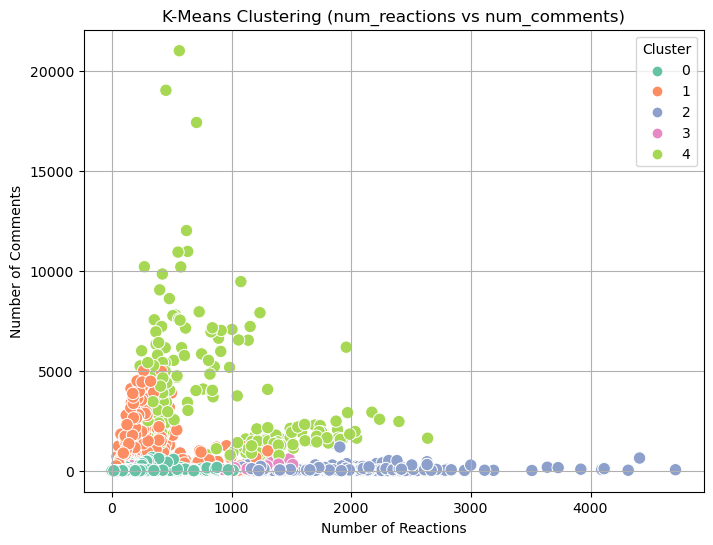

In [104]:
#Train a K-Means clustering model on the Facebook Live Sellers dataset
#Select relevant columns
features = ['status_type', 'num_reactions', 'num_comments', 'num_shares','num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df_cluster = df[features].copy()
# Convert 'status_type' (categorical) to numeric using one-hot encoding
df_cluster = pd.get_dummies(df_cluster, columns=['status_type'], drop_first=True)

# Handle missing values
df_cluster = df_cluster.dropna()

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

#Kmeans clustering
k = 5 
kmeans = KMeans(n_clusters = k, random_state = 40)
df['cluster'] = kmeans.fit_predict(scaled_features)

#plot
plt.figure(figsize=(8, 6))

# Scatter plot of num_reactions vs num_comments
sns.scatterplot(
    data=df, x = 'num_reactions', y = 'num_comments', hue = 'cluster', palette = 'Set2', s = 80)
plt.title('K-Means Clustering (num_reactions vs num_comments)')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.legend(title = 'Cluster')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

range(1, 11)


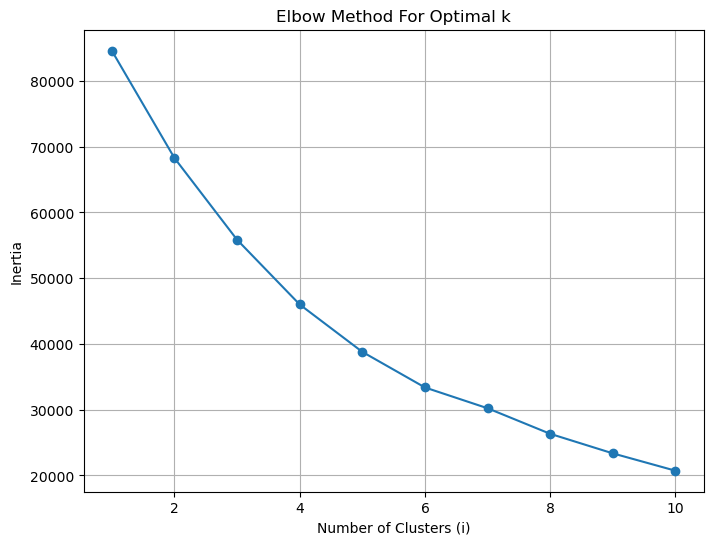

In [110]:
#elbow method to find the optimum number of clusters
# Range of k values to test
k = range(1, 11)

 # To store the inertia for each value of i
inertia = [] 

for i in k:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(scaled_features)
    # scaled_features = normalized/standardized data
    inertia.append(kmeans.inertia_)

print(k)
# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k, inertia, marker='o')
plt.xlabel('Number of Clusters (i)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [114]:
# count of different types of posts in the dataset
post_counts= df['status_type'].value_counts()
print(post_counts)

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


  status_type  num_reactions  num_comments  num_shares
0        link     370.142857      5.698413    4.396825
1       photo     181.290345     15.993470    2.553871
2      status     438.783562     36.238356    2.558904
3       video     283.409597    642.478149  115.679949


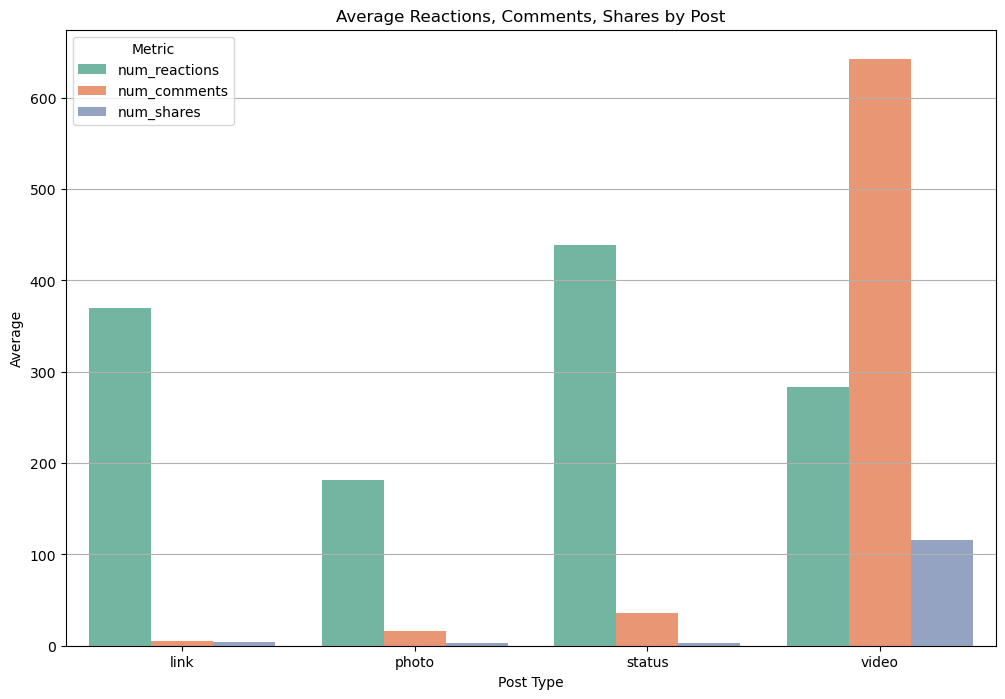

In [130]:
#average value of num_reaction, num_comments, num_shares for each post type
avg = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean().reset_index()
print(avg)

melted_avg = avg.melt(id_vars = 'status_type', var_name = 'Engagement Metric', value_name = 'Average Value')

plt.figure(figsize = (12,8))
sns.barplot(data = melted_avg, x = 'status_type', y = 'Average Value', hue = 'Engagement Metric', palette = 'Set2')
plt.title('Average Reactions, Comments, Shares by Post')
plt.xlabel('Post Type')
plt.ylabel('Average')
plt.grid(axis = 'y')
plt.legend(title='Metric')
plt.show()